In [161]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [162]:
# _변수이름 = pd.read_csv('___경로)파일명',___)
# train : 학습할 용도, test : 실제(답이 없는) 문제, sub : OMR답안지
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv('/kaggle/input/titanic/test.csv')
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

train.shape, test.shape, sub.shape

((891, 12), (418, 11), (418, 2))

In [163]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [165]:
print(train.columns)
print(test.columns)
print(sub.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived'], dtype='object')


* train에는 Survived가 있고, test에는 없다.

In [166]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [167]:
train.describe(include='O') # 문자열 값도 보여준다. (include='영문 대문자 O') 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [168]:
test.head(10) # 맨위부터 10번째 행까지 보여준다.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [169]:
train.isnull() # 정보가 비어있는지 아닌지 True, False 표현

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

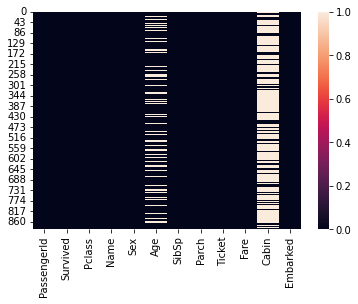

In [170]:
sns.heatmap(train.isnull()) # 히트맵을 통해 시각적으로 표현

In [171]:
## survived
## 01 pclass별 생존자
## 02 성별 생존자

<AxesSubplot:xlabel='Survived', ylabel='count'>

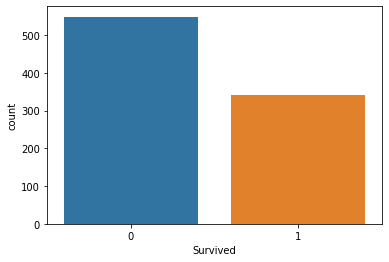

In [172]:
sns.countplot(x='Survived', data=train)

* 생존자가 적다
* 사망자가 500명 이상이다
* 생존자가 300명 정도이다

#### 01 pclss별 생존자

<AxesSubplot:xlabel='Pclass', ylabel='count'>

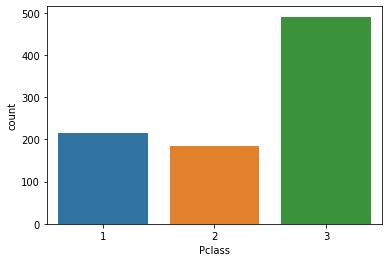

In [173]:
sns.countplot(x='Pclass', data=train) # class별 인원

<AxesSubplot:xlabel='Pclass', ylabel='count'>

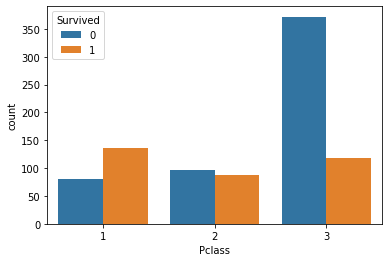

In [174]:
sns.countplot(x='Pclass', hue='Survived', data=train)

* 3등급의 승객은 많은 사람이 사망했다. 생존자에 비해 3배이상
* 사망률이 높은 이유?

#### 02 성별 생존자

<AxesSubplot:xlabel='Sex', ylabel='count'>

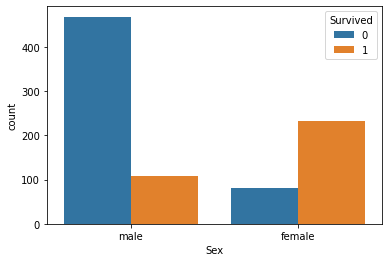

In [175]:
sns.countplot(x='Sex', hue='Survived', data=train) # x축에 수치형이 들어가면 굉장히 많은 ticker가 생겨 오래결리므로 주의!

* 남성의 사망자가 생존자의 4배이상 이다.
* 여성의 사망자가 생존자의 1/3 가량이다.
* 남성의 사망자가 여성의 사망자의 4배 이상이다.
* 여성의 생존자가 남성의 생존자의 2배 이상이다.
* 남성의 탑승객의 수가 여성의 탑승객의 수의 2배 이상.

In [176]:
# boxplot, countplot, barplot, lmplot

#### 가설1) 1등급은 여성이 많아서 그런 것은 아닐까?

<AxesSubplot:xlabel='Pclass', ylabel='count'>

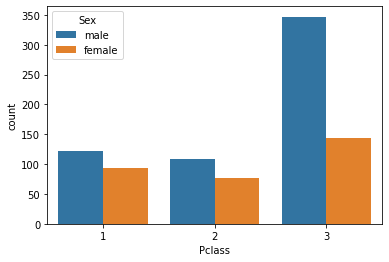

In [177]:
sns.countplot(x='Pclass', hue='Sex', data=train)

* 1등급은 여성이 많기 때문에 생존자가 많은 것은 아니다.

#### 가설2) 나이가 영향을 끼치지 않을까?

<AxesSubplot:xlabel='Age', ylabel='Count'>

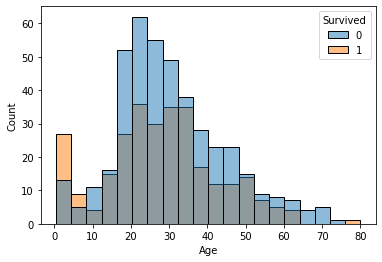

In [178]:
# 전체적인 histgram
sns.histplot(x='Age', hue='Survived', data=train)

* 1등급의 사람들을 뽑고, 그 데이터를 가지고 histogram 그려보기

In [179]:
# 참고
train_p1 = train[train['Pclass']==1]   # 데이터에서 Pclass:1만 가져오기
train_p2 = train[train['Pclass']==2]   # 데이터에서 Pclass:2만 가져오기
train_p3 = train[train['Pclass']==3]   # 데이터에서 Pclass:3만 가져오기

<AxesSubplot:xlabel='Age', ylabel='Count'>

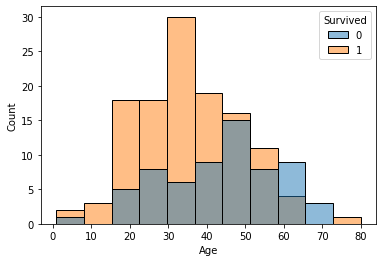

In [180]:
sns.histplot(x='Age', hue='Survived', data=train_p1)

* 1등석 50대 후반이상의 사망율이 높은 편

<AxesSubplot:xlabel='Age', ylabel='Count'>

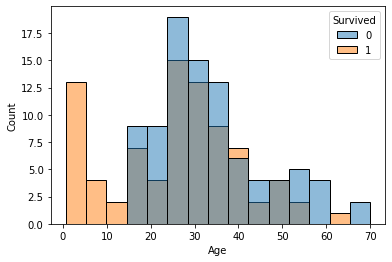

In [181]:
sns.histplot(x='Age', hue='Survived', data=train_p2)

* 2등석 15세이하 생존률이 100%, 30대 후반이상은 생존률이 낮다.

<AxesSubplot:xlabel='Age', ylabel='Count'>

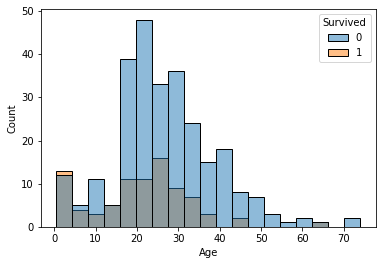

In [182]:
sns.histplot(x='Age', hue='Survived', data=train_p3)

* 3등석은 30대후반 이하 생존률이 30대 후반 이상보다 높다.

#### 가설3) 3등급의 사망자가 많은 이유는 남성이 3등급이 많아서 그런 것이 아닐까?

<AxesSubplot:xlabel='Pclass', ylabel='count'>

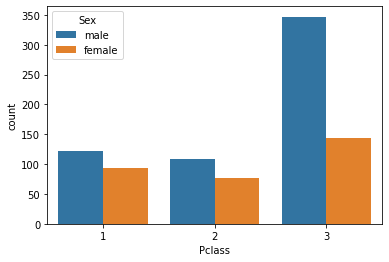

In [183]:
sns.countplot(x='Pclass', hue='Sex', data=train)

* 3등급은 남성이 많다

#### 4-8 (추가) 나이와 남성,여성 정보를 나누어서 생존자 영향을 살펴보자.

In [184]:
train_female = train[train['Sex']=="female"]
train_male = train[train['Sex']=="male"]

<AxesSubplot:xlabel='Age', ylabel='Count'>

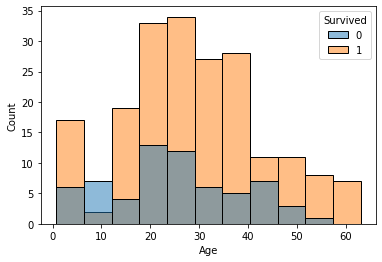

In [185]:
# 여성 생존률, 사망률
sns.histplot(x='Age', hue='Survived', data=train_female)

<AxesSubplot:xlabel='Age', ylabel='Count'>

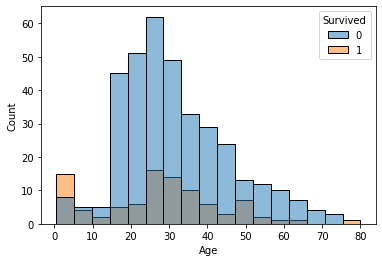

In [186]:
# 남성 생존률, 사망률
sns.histplot(x='Age', hue='Survived', data=train_male)

* 남성의 사망률이 나이와 관계 없이 높다.
* 5세이하의 생존률은 다른 연령보다 높다.

#### 4-9 (추가) 나이와 남성,여성 정보를 나누고, 클래별 생존자 영향을 살펴보자.

In [187]:
train_male = train[train['Sex']=="male"]
train_female = train[train['Sex']=="female"]

# 남성 1등석
train_male_pclass1 = train_male[train_male['Pclass']==1]
# 남성 2등석
train_male_pclass2 = train_male[train_male['Pclass']==2]
# 남성 3등석
train_male_pclass3 = train_male[train_male['Pclass']==3]

# 여성 1등석
train_female_pclass1 = train_female[train_female['Pclass']==1]
# 여성 2등석
train_female_pclass2 = train_female[train_female['Pclass']==2]
# 여성 3등석
train_female_pclass3 = train_female[train_female['Pclass']==3]

<AxesSubplot:xlabel='Age', ylabel='Count'>

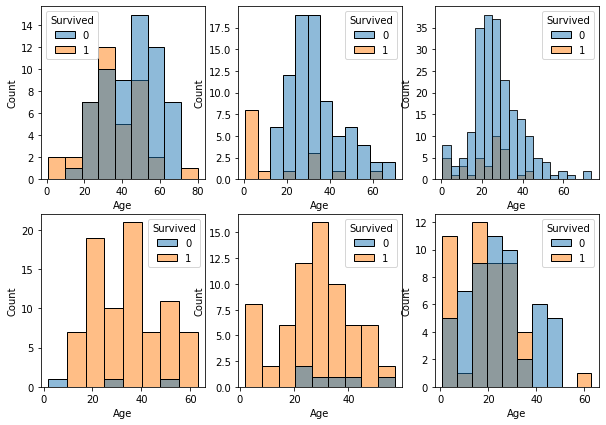

In [188]:
# 남성의 클래스 별 생존률(그래프 여러개 출력)
plt.figure(figsize=(10,7))

# plt.subplot(행 개수,열 개수,배치 순서)
# 남성의 클래스 별 생존률
plt.subplot(2,3,1)
sns.histplot(x='Age', hue='Survived', data=train_male_pclass1)

plt.subplot(2,3,2)
sns.histplot(x='Age', hue='Survived', data=train_male_pclass2)

plt.subplot(2,3,3)
sns.histplot(x='Age', hue='Survived', data=train_male_pclass3)

# 여성의 클래스 별 생존률
plt.subplot(2,3,4)
sns.histplot(x='Age', hue='Survived', data=train_female_pclass1)

plt.subplot(2,3,5)
sns.histplot(x='Age', hue='Survived', data=train_female_pclass2)

plt.subplot(2,3,6)
sns.histplot(x='Age', hue='Survived', data=train_female_pclass3)

* 전체적으로 여성의 생존률이 높다
* 1등석으로 갈수록 생존률이 높다.

In [189]:
# 01 Embarked의 영향
# 02 Fare의 요금 영향

#### 01 Embarked의 영향

In [190]:
## sns.countplot : 막대그래프(x축 존재, y(데이터 개수))
## sns.boxplot : 박스 플룻, 쵀대값, 최소값, 중앙값, 이상치, 12%, 75%
## sns.lmplot(x='', y='', data=__) : 산점도의 경향성을 선형 그래프로 보여준다.
## sns.lmplot(x='', y='', data=__)
## sns.pairplot() : 그래프 여러개(하나의 변수와 다른 변수의 상관관계보기)
## sns.heatmap() : 항목별 도수에 따라 색깔을 다르게 표현
## sns.histplot() : 히스토그램(수치형 컬럼에 대한 분포 등을 확인)
## sns.barplot() : 막대그래프(x는 범주형, y는 그 값의 평균)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

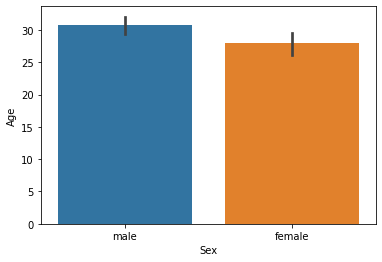

In [191]:
sns.barplot(x='Sex', y='Age', data=train) # 각 항목별 평균을 막대그래프로 표현

<AxesSubplot:xlabel='Embarked', ylabel='count'>

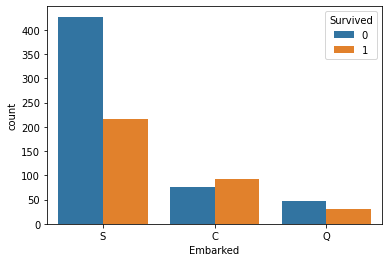

In [192]:
sns.countplot(x='Embarked', hue='Survived', data=train)

* 승선 항구가 S인 사람들이 가장 많고 생존률이 세 항구 중 가장 낮다.
* c 항구 승선 사람의 생존률이 가장 높다.

* S항구 생존자가 많다.
* C항구의 생존자 비율이 높다. 왜?

In [193]:
# my sol.
train_port_c = train[train["Embarked"]=="C"]
train_port_s = train[train["Embarked"]=="S"]
train_port_q = train[train["Embarked"]=="Q"]
train_port_c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C


<AxesSubplot:xlabel='Pclass', ylabel='count'>

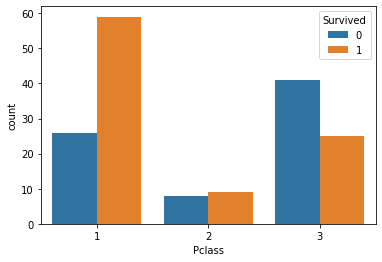

In [194]:
sns.countplot(x='Pclass', hue='Survived', data=train_port_c)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

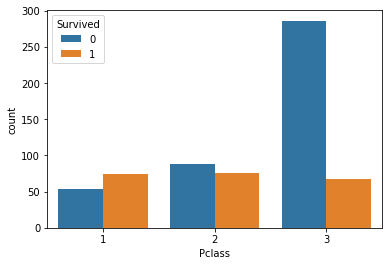

In [195]:
sns.countplot(x='Pclass', hue='Survived', data=train_port_s)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

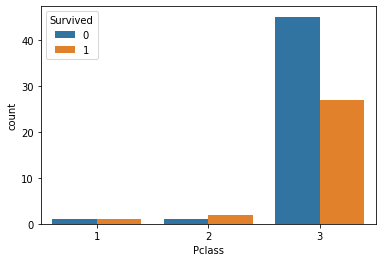

In [196]:
sns.countplot(x='Pclass', hue='Survived', data=train_port_q)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

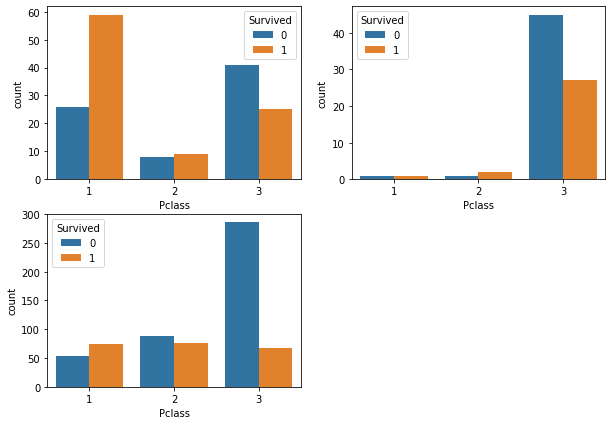

In [197]:
# sol.

train_C = train[train['Embarked']=='C']   # 데이터에서 Embarked:C만 가져오기
train_Q = train[train['Embarked']=='Q']   # 데이터에서 Embarked:Q만 가져오기
train_S = train[train['Embarked']=='S']   # 데이터에서 Embarked:S만 가져오기

# 여러 그래프 한번에 출력
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.countplot(x='Pclass', hue='Survived', data=train_C)

plt.subplot(2,2,2)
sns.countplot(x='Pclass', hue='Survived', data=train_Q)

plt.subplot(2,2,3)
sns.countplot(x='Pclass', hue='Survived', data=train_S)

* c 항구의 탑승자가 다른 항구에 비해 1등급 승객의 비율이 높았다.

#### 6-2 (추가) Fare에 대해 분석해 보기 - 댓글

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

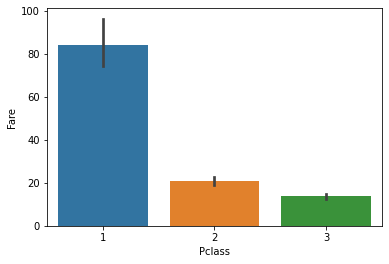

In [198]:
sns.barplot(x='Pclass', y='Fare', data=train)

* 1등석의 평균 가격 : 80 정도
* 2등석의 평균 가격 : 20 정도
* 3등석의 평균 가격 : 15 정도

#### 6-3 (추가) Fare-Age에 대해 알아보기 - 댓글

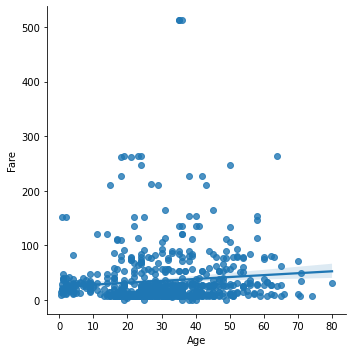

In [199]:
sns.lmplot(x='Age', y='Fare', data=train, height=5)

* 나이가 많을 수록 요금도 상승하는 경향이 보이나 이산값이 많다.
    * 클래스별 나이와 요금 관계를 보는 것이 더 정확 할것 같다.

In [200]:
# 클래스 별 자료 나누기
train_p1 = train[train['Pclass']==1]   # 데이터에서 Pclass:1만 가져오기
train_p2 = train[train['Pclass']==2]   # 데이터에서 Pclass:2만 가져오기
train_p3 = train[train['Pclass']==3]   # 데이터에서 Pclass:3만 가져오기

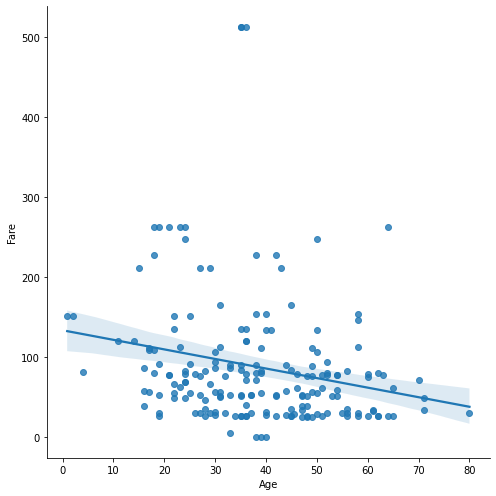

In [201]:
sns.lmplot(x='Age', y='Fare', data=train_p1, height=7)

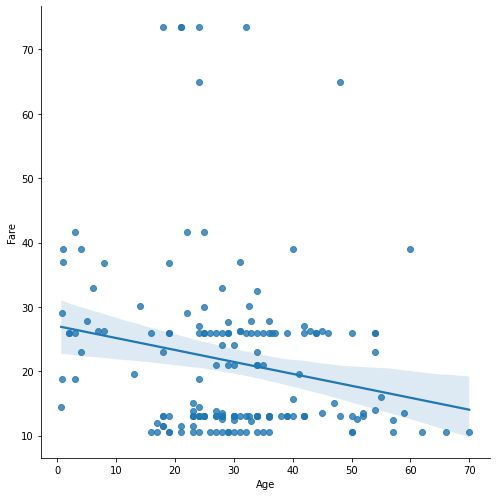

In [202]:
sns.lmplot(x='Age', y='Fare', data=train_p2, height=7)

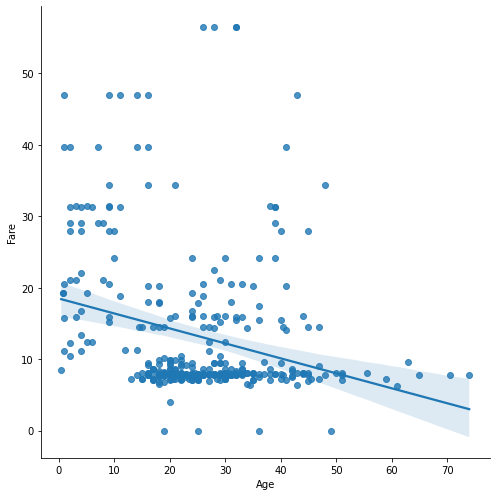

In [203]:
sns.lmplot(x='Age', y='Fare', data=train_p3, height=7)

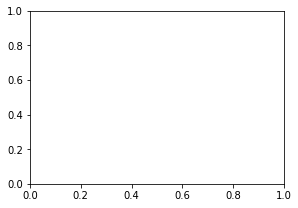

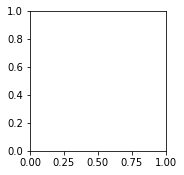

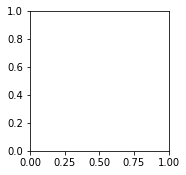

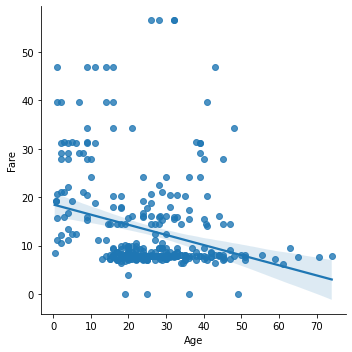

In [206]:
# 클래스 별 자료 나누기
train_p1 = train[train['Pclass']==1]   # 데이터에서 Pclass:1만 가져오기
train_p2 = train[train['Pclass']==2]   # 데이터에서 Pclass:2만 가져오기
train_p3 = train[train['Pclass']==3]   # 데이터에서 Pclass:3만 가져오기

plt.figure(figsize=(10, 7))

plt.subplot(2,2,1)
sns.lmplot(x='Age', y='Fare', data=train_p1)

plt.subplot(2,2,2)
sns.lmplot(x='Age', y='Fare', data=train_p2)

plt.subplot(2,2,3)
sns.lmplot(x='Age', y='Fare', data=train_p3)